# Fetching MNIST dataset from sklearn



In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
X , Y = mnist['data'] , mnist['target']

In [6]:
X.shape, Y.shape

((70000, 784), (70000,))

In [7]:
import matplotlib.pyplot as plt

(array([6313.,    0.,    0.,    0., 6903.,    0.,    0.,    0., 6824.,
           0.,    0.,    0., 7877.,    0.,    0.,    0., 6958.,    0.,
           0.,    0.,    0., 6990.,    0.,    0.,    0., 7141.,    0.,
           0.,    0., 6876.,    0.,    0.,    0., 7293.,    0.,    0.,
           0., 6825.]),
 array([0.        , 0.23684211, 0.47368421, 0.71052632, 0.94736842,
        1.18421053, 1.42105263, 1.65789474, 1.89473684, 2.13157895,
        2.36842105, 2.60526316, 2.84210526, 3.07894737, 3.31578947,
        3.55263158, 3.78947368, 4.02631579, 4.26315789, 4.5       ,
        4.73684211, 4.97368421, 5.21052632, 5.44736842, 5.68421053,
        5.92105263, 6.15789474, 6.39473684, 6.63157895, 6.86842105,
        7.10526316, 7.34210526, 7.57894737, 7.81578947, 8.05263158,
        8.28947368, 8.52631579, 8.76315789, 9.        ]),
 <a list of 38 Patch objects>)

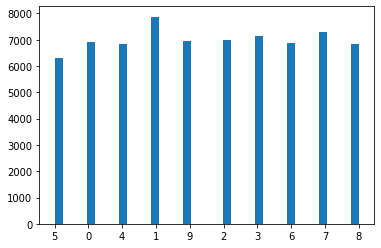

In [8]:
plt.hist(Y, bins = 'auto')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


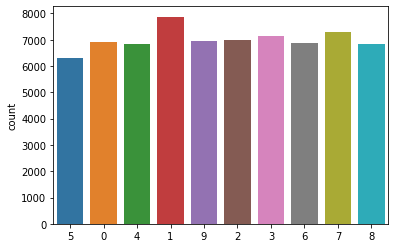

In [9]:
import seaborn as sns
sns.countplot(Y)

# Resahping and plotting the image

In [10]:
% matplotlib inline


In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [12]:
example = X[30000]
example_image = example.reshape(28,28)

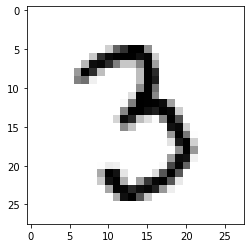

In [13]:
plt.imshow(example_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')

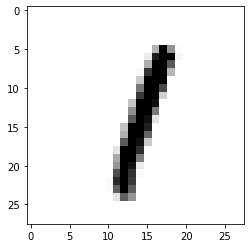

In [14]:

example = X[60005]
example_image = example.reshape(28,28)
plt.imshow(example_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')

# Splitting the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59500, 784), (10500, 784), (59500,), (10500,))

In [18]:
import numpy as np


In [19]:
# shuffling the dataset
shuffle_index = np.random.permutation(59500)
X_train, y_train = X_train[shuffle_index] , y_train[shuffle_index]


In [20]:
X_train.shape, y_train.shape

((59500, 784), (59500,))

# Normalizing the dataset

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

In [23]:
X_train.shape , X_test.shape

((59500, 784), (10500, 784))

In [24]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)


# Training the model

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(500, "relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(X_train, y_train, shuffle=True, validation_split=0.1, batch_size=256, epochs=30, verbose=1)

Epoch 1/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0767 - accuracy: 0.9786 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 2/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0581 - accuracy: 0.9831 - val_loss: 0.0850 - val_accuracy: 0.9739
Epoch 3/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0451 - accuracy: 0.9875 - val_loss: 0.0697 - val_accuracy: 0.9771
Epoch 4/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 0.0649 - val_accuracy: 0.9798
Epoch 5/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0280 - accuracy: 0.9925 - val_loss: 0.0633 - val_accuracy: 0.9800
Epoch 6/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0230 - accuracy: 0.9942 - val_loss: 0.0642 - val_accuracy: 0.9805
Epoch 7/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0183 - accuracy: 0.9960 - val_loss: 0.0620 - val_accuracy: 0.9800

In [30]:
predictions = model.predict(x=X_test, batch_size=256, verbose=0)
rounded_predictions = np.argmax(predictions, axis=-1)

In [36]:
import pandas as pd
df = pd.DataFrame(rounded_predictions, columns=['predictions'])
df1 = pd.DataFrame(y_test, columns = ['original'])  

In [39]:
df0 = pd.concat([df, df1], axis = 1)
df0

,predictions,original
0,8,8
1,4,4
2,8,8
3,7,7
4,7,7
...,...,...
10495,3,3
10496,9,9
10497,2,2
10498,4,4


In [32]:
model.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9803


[0.0836872011423111, 0.9802857041358948]

- On the unseen dataset accuracy is 98.03%
- Loss is 0.0837